## Home Task: Implement K-means algorithm

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Data

In [2]:
from sklearn.datasets import make_classification
Xc_2,_ = make_classification(n_samples=200,
                              n_features=2,
                              n_informative=2,
                              n_redundant=0,
                              random_state=0,
                              n_clusters_per_class=1,
                              class_sep=0.8)

x = Xc_2[:,0]
y = Xc_2[:,1]

Xc_2[:5],x[:5], y[:5]

(array([[ 0.87033369, -1.12915356],
        [-0.27565612,  1.07888341],
        [ 0.68590571,  1.4901946 ],
        [ 1.16581799,  0.87715301],
        [-1.0607126 ,  0.6950888 ]]),
 array([ 0.87033369, -0.27565612,  0.68590571,  1.16581799, -1.0607126 ]),
 array([-1.12915356,  1.07888341,  1.4901946 ,  0.87715301,  0.6950888 ]))

## Data visualization

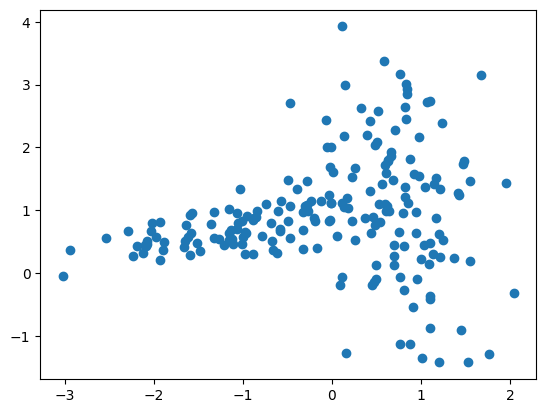

In [3]:
colors = np.array(['green', 'orange', 'grey', 'brown'])

def plot_points(closest_centroids=None):
    if closest_centroids is None:
        plt.scatter(x, y)
    else:
        plt.scatter(x, y, c = colors[closest_centroids])

plt.figure()
plot_points()

<font color = green >

###  Steps of implementatiion

</font>

1) Initialize $K$ centroids 

2) Assign every point to closest centroid 

3) Compute new centroids as means of samples assigned to corresponding centroid

4) Implement cost $J = \frac{1}{m}\underset{i}{\sum}(d^{(i)})^{2}$ where $d^{(i)}$ is distance from sample $x^{(i)}$ to assigned centroid $c^{(i)}$

5) Iterate setps 1,2 till cost is stabile 

6) Select the best clustering (with the least cost) from 100 results computed with random centroid  initializations 

7) Visualize results (clusters, centroids) for $K=4$

Note: 
* You may  need develop couple of additional/intermediate functions
* You may track cost changes to make sure the algorithm is working properly 

<font color = dark >

## 1. Initialize K centroid

cluster coordinates:
 [[-1 -1]
 [-2  2]
 [ 2  0]]

Accommodation:


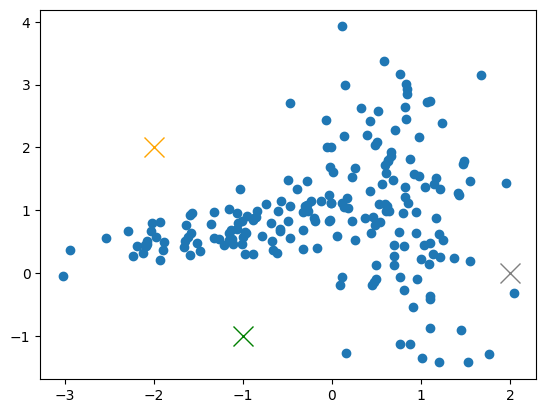

In [4]:
def init_centroids(amount, is_random = True,points = None,seed = 10):
    if is_random:
        np.random.seed(seed)
        return points [np.random.choice(len(points),amount)]
    else:
        centroids = np.array([(-1,-1),(-2,2),(2,0),(1,3)])
        return centroids[:amount]
    
centroids =  init_centroids(3,False)
print("cluster coordinates:\n",centroids)


def plot_centroids(centroids):
    for i, c in enumerate(centroids):
        plt.plot(c[0], c[1], marker='x', color=colors[i], markersize=14)

def draw_state(centroids = None,closest_centroids = None,Name = None):
    plt.figure()
    plot_points(closest_centroids)
    plot_centroids(centroids)
    

print("\nAccommodation:")
draw_state(centroids)


<font color = dark >

## 2. Assign every point to closest centroid 

1) Compute distances from samples to centroids:


In [5]:
def compute_distances(samples, centroids):
    return np.array([np.apply_along_axis(np.linalg.norm, 1, samples-c) for c in centroids])

compute_distances(Xc_2, centroids)

array([[1.87478766, 2.20146094, 3.00721586, 2.86608984, 1.69617572,
        2.035022  , 4.4060628 , 1.59853631, 1.55138203, 3.485087  ,
        2.39288175, 2.38323865, 3.91589107, 2.33975521, 1.52911746,
        2.10082272, 2.79777179, 2.54796579, 1.7939847 , 3.32155904,
        1.7350942 , 2.50081813, 2.33792773, 1.98703454, 2.56889117,
        1.99620281, 1.642644  , 2.23903014, 1.65040848, 2.19524712,
        3.30166496, 1.6480855 , 1.89385586, 1.30653625, 1.85473311,
        2.77338397, 2.55843965, 1.81133993, 1.60287619, 4.06576359,
        2.23570457, 2.13996454, 2.63562901, 2.7754635 , 1.9064495 ,
        1.63749699, 1.72691606, 2.04606283, 2.03927642, 2.81666787,
        1.95006673, 2.67139926, 3.69042599, 1.9940283 , 4.16300825,
        3.31465819, 1.81965095, 2.04041155, 2.8738854 , 4.65593586,
        1.8679423 , 1.95985696, 1.74378452, 2.34095876, 2.1861849 ,
        2.28264032, 1.82731798, 2.86904297, 1.75673853, 2.45315516,
        2.50022812, 2.85917443, 1.72778333, 2.09

Step 1 of iteration: compute closest centroids:

closest_centroids:
 [2 1 2 2 1 1 1 1 0 1 2 2 2 1 0 1 1 2 1 2 1 2 2 2 2 2 0 2 1 2 2 1 1 0 1 2 2
 1 0 2 0 1 2 2 0 0 1 0 2 1 2 2 2 1 1 2 1 1 2 1 2 1 2 1 1 1 1 2 0 2 2 1 0 2
 1 0 0 1 2 0 2 1 0 1 1 2 1 1 2 1 0 1 1 2 1 2 0 1 2 1 1 0 2 2 1 1 1 0 0 2 0
 2 0 2 1 2 2 1 1 1 2 2 2 0 2 2 1 2 1 1 2 1 0 1 1 2 2 2 2 2 2 0 2 0 2 2 2 1
 2 1 0 2 1 1 1 1 2 0 2 2 2 0 2 1 1 2 2 1 0 1 1 2 2 2 0 1 0 2 1 0 1 2 2 0 2
 2 1 1 1 2 2 1 0 1 2 2 1 0 0 2]


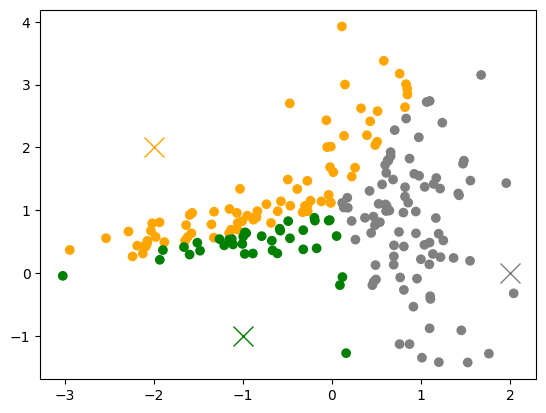

In [6]:
def compute_closest_centroids(centroids):
    all_distances = compute_distances(Xc_2, centroids)
    closest_centroids = np.apply_along_axis(np.argmin, 0, all_distances)
    return closest_centroids


closest_centroids = compute_closest_centroids(centroids)
print('closest_centroids:\n', closest_centroids)
draw_state(centroids=centroids, closest_centroids=closest_centroids)

<font color = dark >

## 3. Compute new centroids as means of samples assigned to corresponding centroid

Step 2 of iteration: compute means:

New centroids: [array([-0.82373842,  0.43323572]), array([-0.7453601 ,  1.32430444]), array([0.89810608, 0.79119096])]


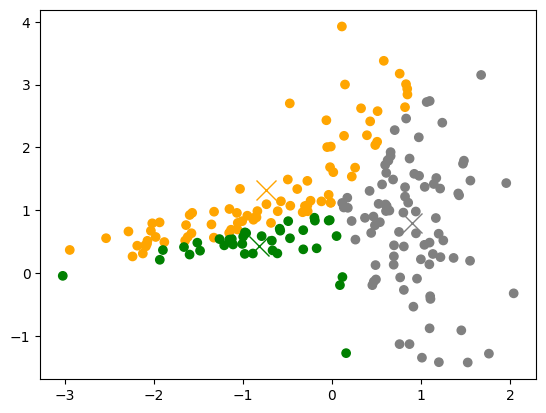

In [7]:
def compute_means(centroids, closest_centroids):
    new_centroids = []
    for i in range(len(centroids)):
        if i not in closest_centroids: 
            new_centroids.append(centroids[i])
        else:
            new_centroid = np.mean(
                Xc_2[np.where(closest_centroids == i)], axis=0)
            new_centroids.append(new_centroid)
    return new_centroids


centroids = compute_means(centroids, closest_centroids)
print('New centroids:', centroids)
draw_state(centroids,closest_centroids)

<font color = dark >

## 4) Implement cost $J = \frac{1}{m}\underset{i}{\sum}(d^{(i)})^{2}$ where $d^{(i)}$ is distance from sample $x^{(i)}$ to assigned centroid $c^{(i)}$

In [8]:
def J(centroids, closest_centroids):

    all_dist = []
    for c_index in set(closest_centroids):
        assigned_samples = Xc_2[np.where(closest_centroids == c_index)]
        all_dist_centroid = compute_distances(
            assigned_samples, [centroids[c_index]])
        all_dist.append(np.sum(all_dist_centroid))
        
    m = len(closest_centroids)
    return 1/m * np.sum(all_dist)

closest_centroids = np.zeros(len(Xc_2), dtype=int)
print('Cost= {}'.format(J(centroids, closest_centroids)))

Cost= 1.4845680579303013


<font color = dark >

## 5. Iterate steps 2,3 till cost is stabile 


The best cost:  0.7055914360789961


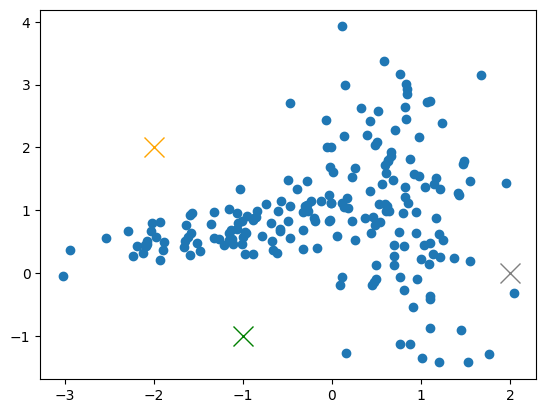

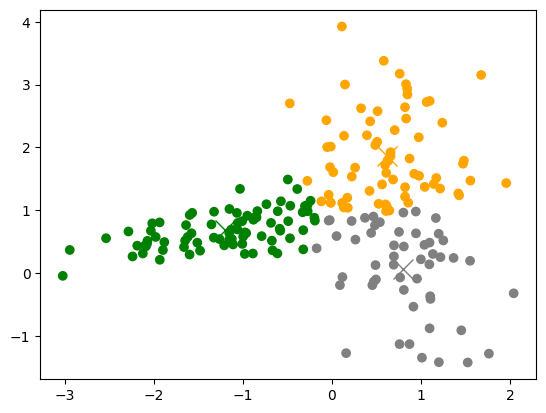

In [9]:
def update(amount,max_iterations = 200,is_randoms = True):
    global closest_centroids
    global centroids
    
    centroids = init_centroids(amount, is_randoms, Xc_2, 2)

    draw_state(centroids)
    cost = 0
    
    for i in range(max_iterations):
        
        closest_centroids = compute_closest_centroids(centroids)
        centroids = compute_means(centroids, closest_centroids)
        new_cost = J(centroids,closest_centroids)
    
        if new_cost == cost:
            break
        else:
            cost = new_cost
    
    draw_state(centroids, closest_centroids)
    return cost
    
cost = update(3,200,False)
print("\nThe best cost: ",cost)

<font color = dark >

## 6. Select the best clustering (with the least cost) from 100 results computed with random centroid  initializations 

The best cost:  0.7867506646444796


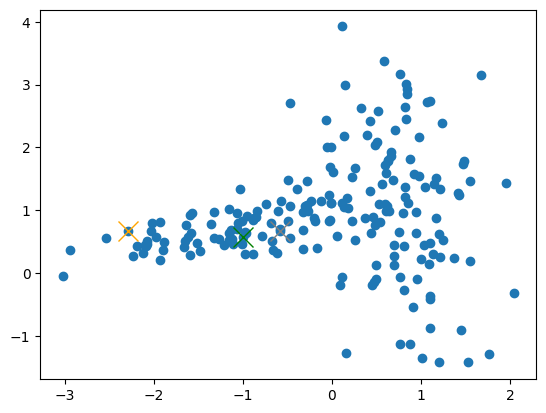

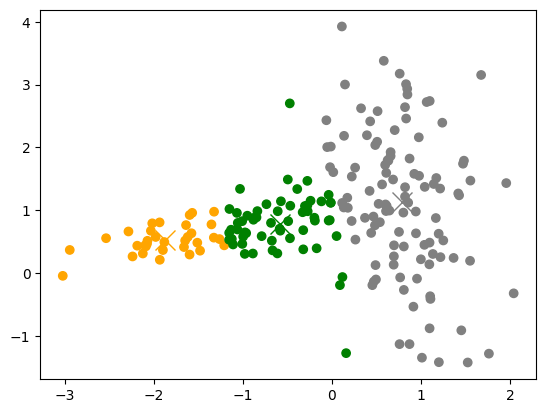

In [10]:
cost = update(3,100,True)
print("The best cost: ",cost)

<font color = dark >

## 7. Visualize results (clusters, centroids) for $K=4$

The best cost:  0.6029478215514041


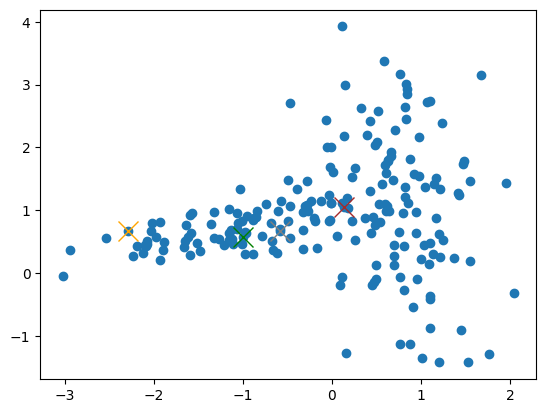

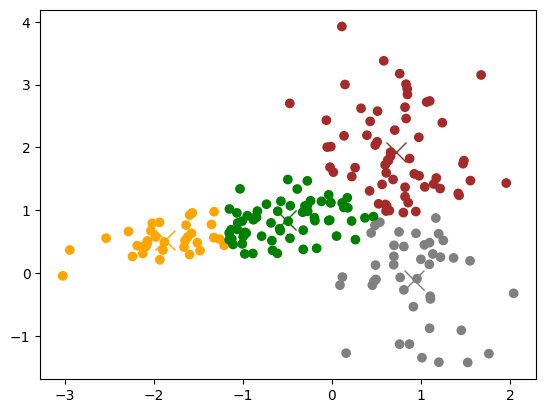

In [11]:
cost = update(4,100,True)
print("The best cost: ",cost)